In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [68]:
df=pd.read_csv("Election_data.csv")
pd.set_option("display.max_columns",None)
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [69]:
df.shape

(21643, 28)

In [70]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [72]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [73]:
df['time'].value_counts()

10/6/2019 21:30    403
10/7/2019 0:15     403
10/6/2019 21:15    403
10/7/2019 0:35     403
10/6/2019 22:55    403
10/6/2019 23:35    403
10/6/2019 23:20    403
10/6/2019 21:50    403
10/6/2019 21:10    403
10/6/2019 22:35    403
10/6/2019 23:15    403
10/6/2019 22:45    403
10/6/2019 23:00    403
10/7/2019 0:25     403
10/6/2019 22:15    403
10/6/2019 21:00    403
10/6/2019 21:05    403
10/6/2019 22:20    403
10/7/2019 0:10     403
10/6/2019 20:50    403
10/6/2019 22:30    403
10/7/2019 0:30     403
10/6/2019 22:10    403
10/6/2019 21:55    403
10/6/2019 23:55    403
10/6/2019 21:40    403
10/6/2019 23:45    403
10/6/2019 23:30    403
10/7/2019 0:05     403
10/6/2019 22:50    403
10/6/2019 20:55    403
10/6/2019 22:00    403
10/6/2019 21:25    403
10/6/2019 20:45    403
10/6/2019 21:20    403
10/7/2019 0:20     403
10/6/2019 23:40    403
10/6/2019 22:05    403
10/6/2019 22:40    403
10/6/2019 23:10    403
10/7/2019 0:00     403
10/6/2019 23:05    403
10/6/2019 21:45    403
10/6/2019 2

In [74]:
df['Day']=pd.to_datetime(df['time']).dt.day
df['Month']=pd.to_datetime(df['time']).dt.month
df['year']=pd.to_datetime(df['time']).dt.year
df['time_hr']=pd.to_datetime(df['time']).dt.hour
df['time_min']=pd.to_datetime(df['time']).dt.minute

In [75]:
df.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,Month,year,time_hr,time_min
0,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,6,10,2019,20,10
1,0,10/6/2019 20:10,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,6,10,2019,20,10


In [76]:
df['Day'].value_counts()

6    18419
7     3224
Name: Day, dtype: int64

In [77]:
df['Month'].value_counts()

10    21643
Name: Month, dtype: int64

In [78]:
df['year'].value_counts()

2019    21643
Name: year, dtype: int64

In [79]:
df.drop(['time','Month','year'],axis=1,inplace=True)

In [80]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,time_hr,time_min
0,0,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,6,20,10
1,0,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,6,20,10
2,0,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,6,20,10
3,0,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,6,20,10
4,0,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,6,20,10


In [81]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,time_hr,time_min
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,6.148963,18.361410,26.955136
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.356060,7.747974,16.623537
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,6.000000,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000,6.000000,20.000000,15.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000,6.000000,21.000000,25.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000,6.000000,22.000000,40.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000,7.000000,23.000000,55.000000


In [82]:
#Checking the unique values and their count
for i in df.columns:
    print(df[i].value_counts())
    print()

255    403
40     403
135    403
55     403
230    403
150    403
70     403
245    403
165    403
85     403
260    403
180    403
100    403
195    403
115    403
35     403
210    403
130    403
50     403
225    403
145    403
65     403
240    403
160    403
80     403
175    403
215    403
120    403
75     403
125    403
45     403
220    403
140    403
60     403
235    403
200    403
155    403
250    403
110    403
190    403
170    403
90     403
265    403
185    403
105    403
95     403
205    403
15     386
20     386
30     386
5      386
10     386
25     386
0      386
Name: TimeElapsed, dtype: int64

Leiria                  1134
Porto                   1134
TerritÃ³rio Nacional    1134
Braga                   1134
Madeira                 1080
Viseu                   1080
SetÃºbal                1080
Coimbra                 1080
Lisboa                  1080
Viana do Castelo        1080
Aveiro                  1080
Ã‰vora                  1026
SantarÃ©m               1

In [83]:
df.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,time_hr,time_min
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007,0.616137,-0.512023,-0.013847
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117,0.136754,-0.107229,-0.003044
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764,-0.136227,0.106453,0.002638
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009,-0.000534,0.000270,-0.000150
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177,0.034277,-0.020880,-0.004171
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583,0.082068,-0.058268,-0.003287
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195,0.001354,0.004426,-0.005108
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663,0.079072,-0.056045,-0.003722
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659,-0.081751,0.052503,0.002136
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048,0.014714,-0.011332,0.001773


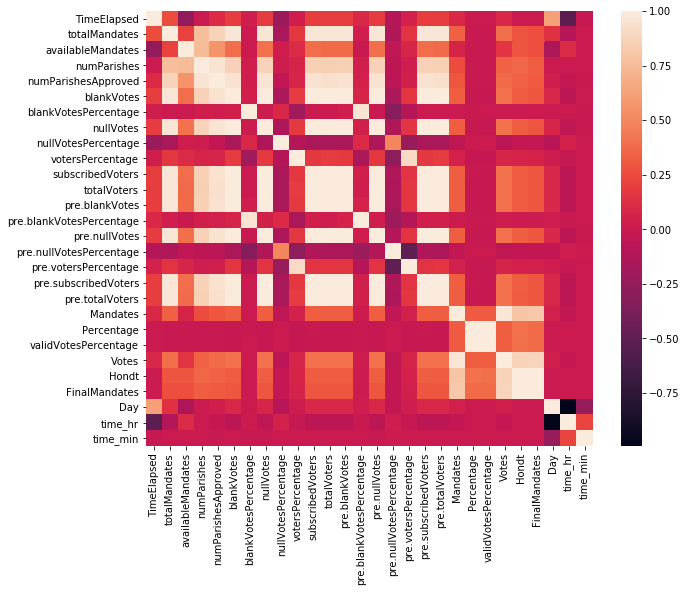

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

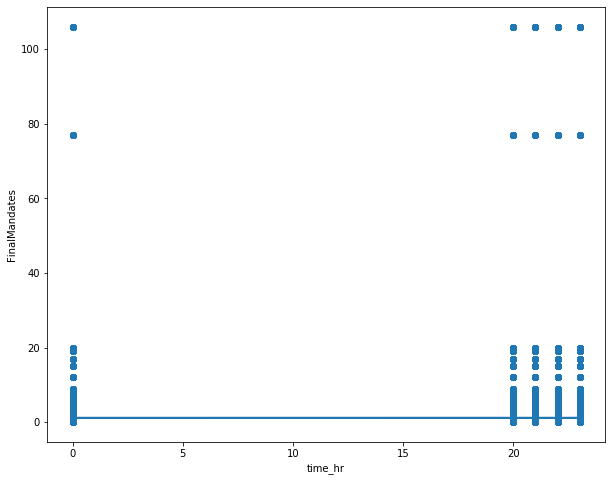

In [85]:
plt.figure(figsize=(10,8))
sns.regplot(x="time_hr",y="FinalMandates",data=df)
plt.show()

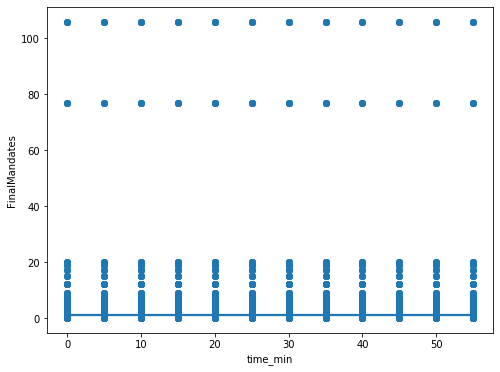

In [86]:
plt.figure(figsize=(8,6))
sns.regplot(x="time_min",y="FinalMandates",data=df)
plt.show()

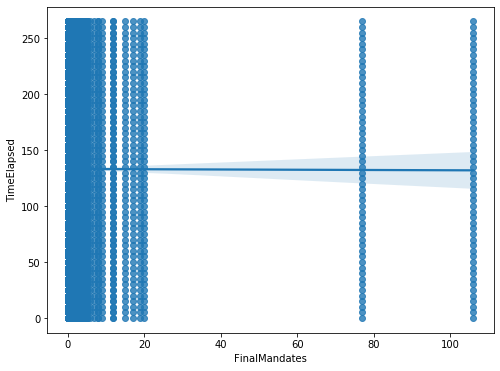

In [87]:
plt.figure(figsize=(8,6))
sns.regplot(y="TimeElapsed",x="FinalMandates",data=df)
plt.show()

<Figure size 1080x432 with 0 Axes>

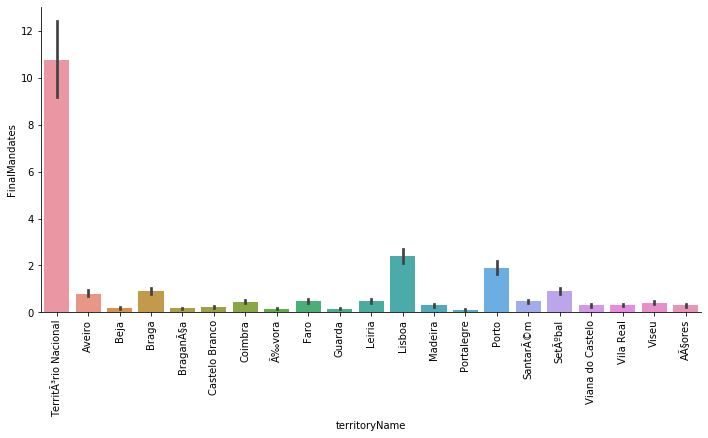

In [88]:
plt.figure(figsize=(15,6))
sns.catplot(x="territoryName",y="FinalMandates",data=df,kind='bar',size=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

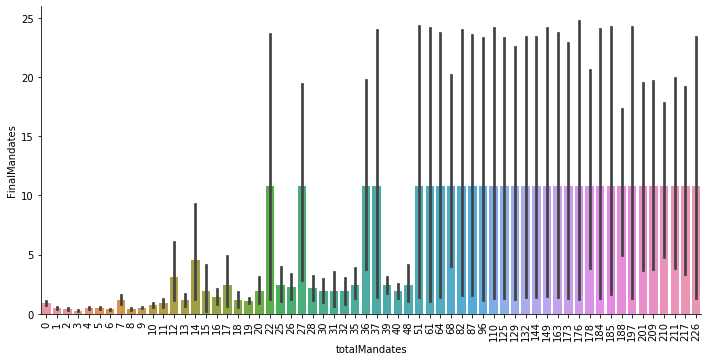

In [89]:
plt.figure(figsize=(15,6))
sns.catplot(x="totalMandates",y="FinalMandates",data=df,kind='bar',size=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

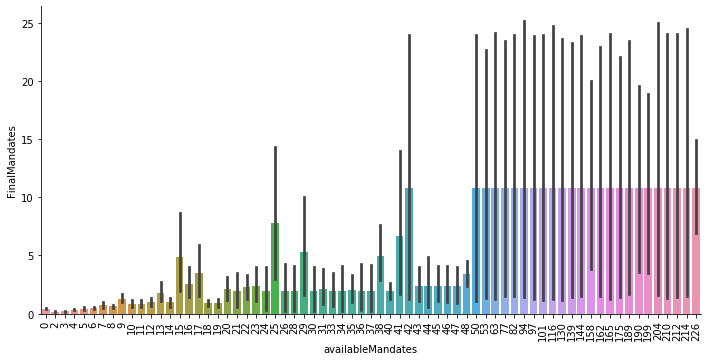

In [90]:
plt.figure(figsize=(15,6))
sns.catplot(x="availableMandates",y="FinalMandates",data=df,kind='bar',size=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

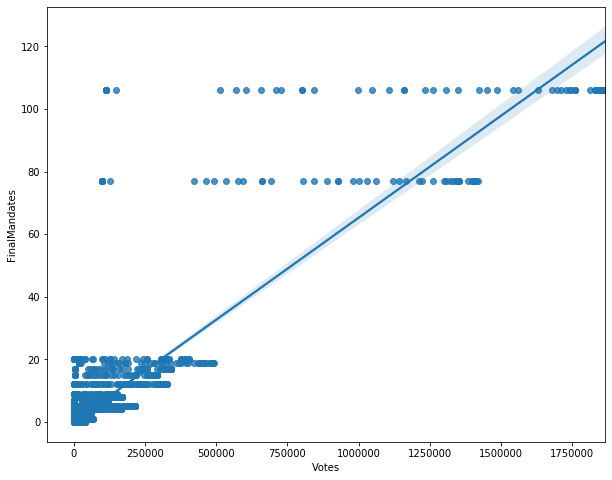

In [91]:
plt.figure(figsize=(10,8))
sns.regplot(x="Votes",y="FinalMandates",data=df)
plt.show()

<Figure size 1080x432 with 0 Axes>

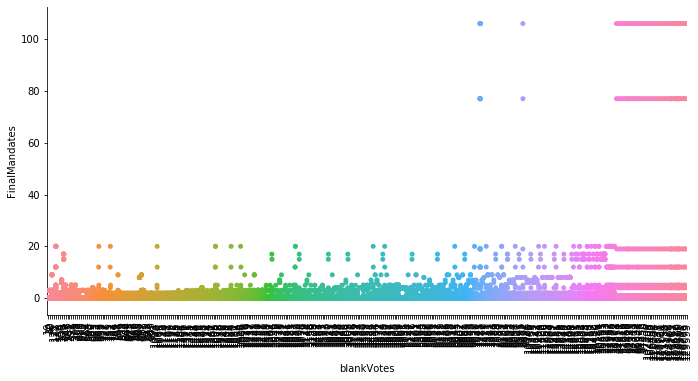

In [92]:
plt.figure(figsize=(15,6))
sns.catplot(x="blankVotes",y="FinalMandates",data=df,size=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

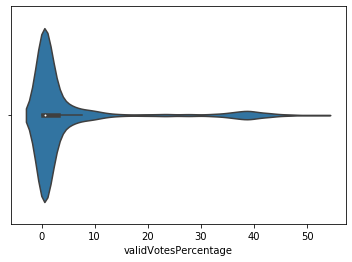

In [93]:
sns.violinplot(x="validVotesPercentage",data=df)

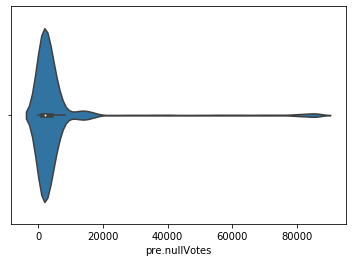

In [94]:
sns.violinplot(x="pre.nullVotes",data=df)

<Figure size 1080x432 with 0 Axes>

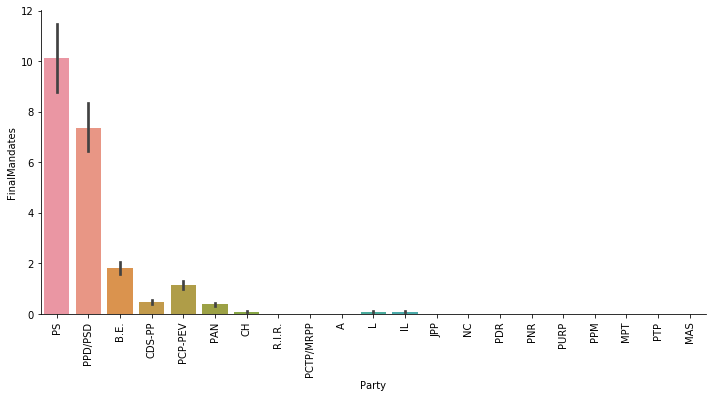

In [95]:
plt.figure(figsize=(15,6))
sns.catplot(x="Party",y="FinalMandates",data=df,kind='bar',size=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

In [96]:
#Converting the categorical data into numeric data using Labelencoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['territoryName']=lb.fit_transform(df['territoryName'])
df['Party']=lb.fit_transform(df['Party'])


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   territoryName             21643 non-null  int32  
 2   totalMandates             21643 non-null  int64  
 3   availableMandates         21643 non-null  int64  
 4   numParishes               21643 non-null  int64  
 5   numParishesApproved       21643 non-null  int64  
 6   blankVotes                21643 non-null  int64  
 7   blankVotesPercentage      21643 non-null  float64
 8   nullVotes                 21643 non-null  int64  
 9   nullVotesPercentage       21643 non-null  float64
 10  votersPercentage          21643 non-null  float64
 11  subscribedVoters          21643 non-null  int64  
 12  totalVoters               21643 non-null  int64  
 13  pre.blankVotes            21643 non-null  int64  
 14  pre.bl

In [98]:
df['FnlMandate']=df['FinalMandates']
df.drop("FinalMandates",axis=1,inplace=True)

In [99]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Day,time_hr,time_min,FnlMandate
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94,6,20,10,106
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81,6,20,10,77
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16,6,20,10,19
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12,6,20,10,5
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11,6,20,10,12


In [100]:
from scipy.stats import zscore
print(df.shape)
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(21643, 30)


(18333, 30)

In [101]:
# Separating the target and input variable
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.shape)
y.shape

(18333, 29)


(18333, 1)

In [102]:
# Checking the skewness of the data
x.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
Day                         1.949782
t

In [103]:
#using sqrt function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [104]:
x.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.634916
availableMandates           0.998395
numParishes                 0.205230
numParishesApproved        -0.034540
blankVotes                  0.787531
blankVotesPercentage       -0.844508
nullVotes                   0.849666
nullVotesPercentage         0.388073
votersPercentage           -0.392023
subscribedVoters            1.042935
totalVoters                 1.169783
pre.blankVotes              0.868433
pre.blankVotesPercentage   -0.410446
pre.nullVotes               0.869955
pre.nullVotesPercentage     0.721158
pre.votersPercentage       -0.514215
pre.subscribedVoters        1.007046
pre.totalVoters             1.150252
Party                       0.009657
Mandates                    4.344943
Percentage                  2.155430
validVotesPercentage        2.159442
Votes                       3.178353
Hondt                       3.558080
Day                         1.949782
t

In [105]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [106]:
x.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates              -0.540047
availableMandates           0.227025
numParishes                 0.205230
numParishesApproved        -0.034540
blankVotes                 -0.544686
blankVotesPercentage       -0.844508
nullVotes                  -0.821687
nullVotesPercentage         0.388073
votersPercentage           -0.392023
subscribedVoters           -0.765971
totalVoters                -0.639108
pre.blankVotes             -0.591116
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.880336
pre.nullVotesPercentage     0.544164
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.796823
pre.totalVoters            -0.662155
Party                       0.009657
Mandates                    3.759840
Percentage                  1.286489
validVotesPercentage        1.281494
Votes                       0.364830
Hondt                       2.816852
Day                         1.949782
t

In [107]:
# Applying Standardscaler for scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-1.752045,-1.741356,-1.649373,1.266121,0.03381,-1.868276,-1.982368,0.540356,-2.520034,-1.070551,0.18551,-2.372329,-2.313035,-2.244833,-0.45199,-2.447965,-0.324505,-0.133418,-2.404767,-2.382764,1.177919,-0.264751,2.900065,2.894218,0.510418,3.898339,-0.421705,0.212549,-1.013809
1,-1.752045,-1.741356,-1.649373,1.266121,0.03381,-1.868276,-1.982368,0.540356,-2.520034,-1.070551,0.18551,-2.372329,-2.313035,-2.244833,-0.45199,-2.447965,-0.324505,-0.133418,-2.404767,-2.382764,-1.435236,-0.264751,1.456092,1.456594,-0.277358,1.928818,-0.421705,0.212549,-1.013809
2,-1.752045,-1.741356,-1.649373,1.266121,0.03381,-1.868276,-1.982368,0.540356,-2.520034,-1.070551,0.18551,-2.372329,-2.313035,-2.244833,-0.45199,-2.447965,-0.324505,-0.133418,-2.404767,-2.382764,-1.271914,-0.264751,1.287997,1.289286,-0.377418,1.928818,-0.421705,0.212549,-1.013809
3,-1.752045,-1.741356,-1.649373,1.266121,0.03381,-1.868276,-1.982368,0.540356,-2.520034,-1.070551,0.18551,-2.372329,-2.313035,-2.244833,-0.45199,-2.447965,-0.324505,-0.133418,-2.404767,-2.382764,0.197986,-0.264751,0.547615,0.549152,-0.850610,-0.344889,-0.421705,0.212549,-1.013809
4,-1.752045,-1.741356,-1.649373,1.266121,0.03381,-1.868276,-1.982368,0.540356,-2.520034,-1.070551,0.18551,-2.372329,-2.313035,-2.244833,-0.45199,-2.447965,-0.324505,-0.133418,-2.404767,-2.382764,0.034664,-0.264751,0.435287,0.438842,-0.927483,-0.344889,-0.421705,0.212549,-1.013809


In [108]:
#Calculating best r_state for train_test_split
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [109]:
def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at r state", r_state, "is", r2score )
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score", max_r2_score, "is achieved at r_state", final_r_state)

In [110]:
lr=LinearRegression()
maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.7281521925331637
The r2 score at r state 43 is 0.720892536328789
The r2 score at r state 44 is 0.7174702537160569
The r2 score at r state 45 is 0.7162878698079594
The r2 score at r state 46 is 0.6885653464490005
The r2 score at r state 47 is 0.7022544565231186
The r2 score at r state 48 is 0.7420999730823534
The r2 score at r state 49 is 0.7491774681795498
The r2 score at r state 50 is 0.7177895579377159
The r2 score at r state 51 is 0.7026534963460825
The r2 score at r state 52 is 0.7325061807397371
The r2 score at r state 53 is 0.7249917898154199
The r2 score at r state 54 is 0.7298825278054875
The r2 score at r state 55 is 0.7217417592638253
The r2 score at r state 56 is 0.7016513076346023
The r2 score at r state 57 is 0.6986017891574187
The r2 score at r state 58 is 0.7298236494709692
The r2 score at r state 59 is 0.7297330380572402
The r2 score at r state 60 is 0.7179418490879063
The r2 score at r state 61 is 0.7192089722394541
The r2 score at r sta

In [111]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=77,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14666, 29)
(14666, 1)
(3667, 29)
(3667, 1)


In [112]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.7281521925331637
The r2 score at r state 43 is 0.720892536328789
The r2 score at r state 44 is 0.7174702537160569
The r2 score at r state 45 is 0.7162878698079594
The r2 score at r state 46 is 0.6885653464490005
The r2 score at r state 47 is 0.7022544565231186
The r2 score at r state 48 is 0.7420999730823534
The r2 score at r state 49 is 0.7491774681795498
The r2 score at r state 50 is 0.7177895579377159
The r2 score at r state 51 is 0.7026534963460825
The r2 score at r state 52 is 0.7325061807397371
The r2 score at r state 53 is 0.7249917898154199
The r2 score at r state 54 is 0.7298825278054875
The r2 score at r state 55 is 0.7217417592638253
The r2 score at r state 56 is 0.7016513076346023
The r2 score at r state 57 is 0.6986017891574187
The r2 score at r state 58 is 0.7298236494709692
The r2 score at r state 59 is 0.7297330380572402
The r2 score at r state 60 is 0.7179418490879063
The r2 score at r state 61 is 0.7192089722394541
The r2 score at r sta

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [114]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [115]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [116]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]


algorithm=[LinearRegression(),SVR(C= 10, kernel= 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=1)]
for i in algorithm:
    l=i
    print(l)
    l.fit(train_x,train_y)
    pred=l.predict(test_x)
    r2score=r2_score(test_y,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(test_y,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(test_y,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.7161075057170103
The CV Score is -6.223748525422201e+25
Mean Squared Error is 0.706588895438634
Root Mean Squared Error is:  0.840588422141677
Mean Absolute Error is:  0.3140034489925544


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.9887083643445602
The CV Score is 0.6402268967044571
Mean Squared Error is 0.028104104638706967
Root Mean Squared Error is:  0.1676427888061606
Mean Absolute Error is:  0.0631849148815261


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_

In [117]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.716108,-6.223749e+25,0.706589,0.840588,0.314003
1,SVR,0.988708,6.402269e-01,0.028104,0.167643,0.063185
2,DecisionTreeRegressor,0.999890,9.886223e-01,0.000273,0.016514,0.000273
3,KNeighborsRegressor,0.986085,9.181258e-01,0.034633,0.186100,0.009545


In [118]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maxr2_score(rf,x,y)

The r2 score at r state 42 is 0.9992007644236223
The r2 score at r state 43 is 0.9998498573725004
The r2 score at r state 44 is 0.9997306897235193
The r2 score at r state 45 is 0.9998709319576812
The r2 score at r state 46 is 0.9996817050458455
The r2 score at r state 47 is 0.9998860830251969
The r2 score at r state 48 is 0.9990073899022355
The r2 score at r state 49 is 0.9997183845563646
The r2 score at r state 50 is 0.9995361331951098
The r2 score at r state 51 is 0.9990140420735932
The r2 score at r state 52 is 0.9996553451381572
The r2 score at r state 53 is 0.9996060898375823
The r2 score at r state 54 is 0.9996988341286701
The r2 score at r state 55 is 0.9993533299282767
The r2 score at r state 56 is 0.9996883705017746
The r2 score at r state 57 is 0.9999640674852032
The r2 score at r state 58 is 0.999233734214678
The r2 score at r state 59 is 0.9997470798791674
The r2 score at r state 60 is 0.9990447644647492
The r2 score at r state 61 is 0.9993675239860328
The r2 score at r sta

In [119]:
#Lets use cross val score with RandomForestRegressor
print("Mean r2 score for RandomForestRegressor:", cross_val_score(rf,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for RandomForestRegressor: ", cross_val_score(rf,x,y,cv=5,scoring='r2').std())

Mean r2 score for RandomForestRegressor: 0.9854892374678667
standard deviation in r2 score for RandomForestRegressor:  0.02674898457351643


In [120]:
# since RandomForestRegressor show best accuracy among all.. So lets finalize this model
rf=RandomForestRegressor(n_estimators=200,random_state=57)

In [121]:
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=57, verbose=0, warm_start=False)

In [122]:
rf.score(train_x,train_y)

0.9999505989044366

In [123]:
rf.score(test_x,test_y)

0.9997778519984922

In [124]:
pred=rf.predict(test_x)

In [125]:
pred

array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.005])

In [126]:
print("RMSE is :",np.sqrt(mean_squared_error(test_y,pred)))
print("r2 score is :",r2_score(test_y,pred))

RMSE is : 0.023514061728910227
r2 score is : 0.9997778519984922


In [127]:
# Saving The Model
from sklearn.externals import joblib
joblib.dump(rf,"rf_Election_Dataset_Prediction.pkl")

['rf_Election_Dataset_Prediction.pkl']